In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e10/sample_submission.csv
/kaggle/input/playground-series-s5e10/train.csv
/kaggle/input/playground-series-s5e10/test.csv


# ***Setup and Data Loading***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from  sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

## ***📊 Dataset Overview***

In [3]:
# Load the training dataset
train = pd.read_csv('/kaggle/input/playground-series-s5e10/train.csv')
# Load the testing dataset
test = pd.read_csv('/kaggle/input/playground-series-s5e10/test.csv')

# ****🔍 Exploratory Data Analysis (EDA)****

- Inspected data structure, shapes, and basic statistics.  
- Checked missing values and feature distributions.  
- Visualized the target (`accident_risk`) to understand skewness and outliers.  
- Explored feature correlations to identify the most predictive variables.

In [4]:
# Display the first 5 rows of  DataFrames
print("Training head:")
display(train.head())


# Display the first 5 rows of  DataFrames
print("\nTesting  head:")
display(test.head())

Training head:


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56



Testing  head:


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [ ]:
# Display basic info
print("Train shape:", train.shape)
print("Train shape:",train.shape)

In [ ]:
print("\n Train \n")
print("Train info:",train.info())
print("\n Test  \n")
print("test info:",train.info())

# **Check for missing values**

In [ ]:
print("\nMissing values in train data:\n")
display(train.isnull().sum())
print("\nMissing values in test data:\n")
display(test.isnull().sum())

# Visualize the distribution of the target variable

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(train['accident_risk'],bins=30, kde=True)
plt.title('Distribution of accident_risk')
plt.xlabel('accident_risk')
plt.ylabel('Frequency')
plt.show()

# Column lists for convenience


In [5]:
# Identify numeric and categorical columns based on the known schema
num_cols = ["num_lanes","curvature","speed_limit","num_reported_accidents","accident_risk"] # numerical features
cat_cols = ["road_type", "lighting", "weather", "road_signs_present", "public_road", "time_of_day", "holiday", "school_season"] # categorical features

# ****Univariate analysis: numerical features****

In [ ]:
for col in num_cols:
 plt.figure(figsize=(7,4))
 sns.histplot(train[col],bins=30,kde=True)
 plt.title(f"measurment of {col}")
 plt.xlabel(f"{col}")
 plt.ylabel("frequency")
 plt.tight_layout()

# ****Univariat Analysis : catogorical columns**** 

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=train)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# ****Visualize Feature Correlations****

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(train[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Train Data ')
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


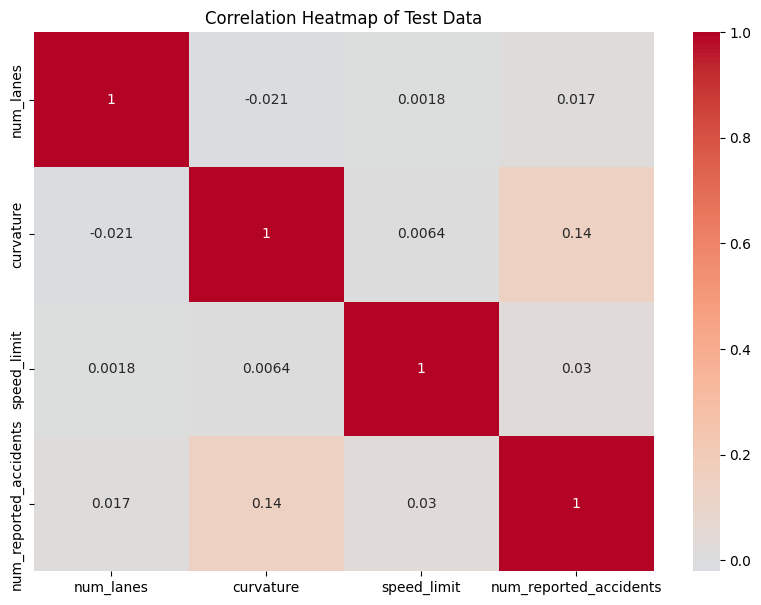

In [6]:
num_cols_test = ["num_lanes","curvature","speed_limit","num_reported_accidents"] # numerical 
plt.figure(figsize=(10,7))
sns.heatmap(test[num_cols_test].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Test Data')
plt.show()

# Handling Out Layers 

# visualisation of out layers

In [ ]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=train,x=col)
    plt.title(f'Out Layers in {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()

# **Removing the out layers**


In [ ]:
for col in num_cols:
        Q1 = train[col].quantile(0.25)
        Q3 = train[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        train = train[
            (train[col] >= lower_bound) & (train[col] <= upper_bound)
        ]

# visualisation After removing out layers

In [ ]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=train,x=col)
    plt.title(f'After removing out layers in {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()

# ****Handling outlayers for test data****

In [ ]:
num_cols_test = ["num_lanes","curvature","speed_limit","num_reported_accidents"] # numerical 
for col in num_cols_test:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=test,x=col)
    plt.title(f'Out Layers in {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()
    

In [ ]:
for col in num_cols_test:
        Q1 = test[col].quantile(0.25)
        Q3 = test[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        test = test[
            (test[col] >= lower_bound) & (test[col] <= upper_bound)
        ]

In [ ]:
for col in num_cols_test:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=test,x=col)
    plt.title(f'After removing out layers in {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()

# *****Data preprocessing*****

# ******Encoding categorical variables******

In [7]:
#train
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Get categorical columns automatically (object or category dtype)
cat_cols = train.select_dtypes(include=["object","bool", "category"]).columns.tolist()
print("Categorical columns:", cat_cols)

# 2. Create encoder
encoder = OneHotEncoder(sparse=False, drop="first")

# 3. Fit + transform categorical data
encoded = encoder.fit_transform(train[cat_cols])

# 4. Get new column names
encoded_cols = encoder.get_feature_names_out(cat_cols)

# 5. Convert to dataframe
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=train.index)

# 6. Drop original categorical columns and join new ones
train_encoded = train.drop(columns=cat_cols).join(encoded_df)

display(train_encoded.head())

Categorical columns: ['road_type', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season']


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,road_signs_present_True,public_road_True,time_of_day_evening,time_of_day_morning,holiday_True,school_season_True
0,0,2,0.06,35,1,0.13,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,4,0.99,35,0,0.35,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,2,4,0.63,70,2,0.30,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,3,4,0.07,35,1,0.21,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,4,1,0.58,60,1,0.56,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
#test
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Get categorical columns automatically (object or category dtype)
cat_cols = test.select_dtypes(include=["object","bool", "category"]).columns.tolist()
print("Categorical columns:", cat_cols)

# 2. Create encoder
encoder = OneHotEncoder(sparse=False, drop="first")

# 3. Fit + transform categorical data
encoded = encoder.fit_transform(test[cat_cols])

# 4. Get new column names
encoded_cols = encoder.get_feature_names_out(cat_cols)

# 5. Convert to dataframe
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=test.index)

# 6. Drop original categorical columns and join new ones
test_encoded = test.drop(columns=cat_cols).join(encoded_df)

display(test_encoded.head())

Categorical columns: ['road_type', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season']


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,num_lanes,curvature,speed_limit,num_reported_accidents,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,road_signs_present_True,public_road_True,time_of_day_evening,time_of_day_morning,holiday_True,school_season_True
0,517754,2,0.34,45,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1,517755,3,0.04,45,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,517756,2,0.59,35,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,517757,4,0.95,35,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,517758,2,0.86,35,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## ****lable encode (optional)****

In [ ]:
# Identify categorical columns
cat_cols = train.select_dtypes(include=["object","bool"]).columns.tolist()
print("Categorical Columns:", cat_cols)


# Apply Label Encoding
le = LabelEncoder()
for col in cat_cols:
    train[col] = le.fit_transform(train[col].astype(str))

In [ ]:
# Identify categorical columns
cat_cols = test.select_dtypes(include=["object","bool"]).columns.tolist()
print("Categorical Columns:", cat_cols)


# Apply Label Encoding
le = LabelEncoder()
for col in cat_cols:
    test[col] = le.fit_transform(test[col].astype(str))

# ******Transformation******

# Log Transformation

In [ ]:
for col in num_cols:
 train_encoded[col] = np.log1p(train_encoded[col])

In [ ]:
for col in num_cols_test:
 test_encoded[col] = np.log1p(test_encoded[col])

## *****Feature Scaling*****

  # scale numerical features using (standerd scalar)

In [ ]:
# Scale numerical features
numerical_cols = ["num_lanes","curvature","speed_limit","num_reported_accidents","accident_risk"] # numerical features
scaler = StandardScaler()
#train_encoded[numerical_cols] = scaler.fit_transform(train_encoded[numerical_cols])
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

In [ ]:
# Scale numerical features
numerical_cols = ["num_lanes","curvature","speed_limit","num_reported_accidents"] # numerical features
scaler = StandardScaler()
#test_encoded[numerical_cols] = scaler.fit_transform(test_encoded[numerical_cols])
test[numerical_cols] = scaler.fit_transform(test[numerical_cols])

# ****feather scaled for both catogorical and numerical(optional)****

In [ ]:
#train
scaler = StandardScaler()
train_encoded = scaler.fit_transform(train_encoded)

In [ ]:
#test
scaler = StandardScaler()
test_encoded = scaler.fit_transform(test_encoded)

 # scale numerical features using (MinMaxScaler scalar)

In [9]:
# Scale numerical features
numerical_cols = ["num_lanes","curvature","speed_limit","num_reported_accidents","accident_risk"] # numerical features
scaler = MinMaxScaler()
train_encoded[numerical_cols] = scaler.fit_transform(train_encoded[numerical_cols])

In [10]:
# Scale numerical features
numerical_cols = ["num_lanes","curvature","speed_limit","num_reported_accidents"] # numerical features
scaler = MinMaxScaler()
test_encoded[numerical_cols] = scaler.fit_transform(test_encoded[numerical_cols])

# ****feather scaled for both catogorical and numerical(optional)****

In [ ]:
#train
scaler = MinMaxScaler()
train_encoded = scaler.fit_transform(train_encoded)

In [ ]:
#test
scaler = MinMaxScaler()
test_encoded = scaler.fit_transform(test_encoded)

# ****train + validation split**** 

In [11]:
X = train_encoded.drop(['id', 'accident_risk'], axis=1)
y = train_encoded['accident_risk']
X_test=test_encoded.drop(['id'], axis=1)


print("X shape:", X.shape)
print("y shape:", y.shape)
print(X_test.shape)

X shape: (517754, 16)
y shape: (517754,)
(172585, 16)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (414203, 16)
X_val shape: (103551, 16)
y_train shape: (414203,)
y_val shape: (103551,)


# Training And Evaluate Models

In [13]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
# Initialize the CatBoost model
catboost = CatBoostRegressor(random_state=42, verbose=0) # verbose=0 to suppress output during training

# Train the CatBoost model
print("Training CatBoost model...")
catboost.fit(X_train, y_train)

# Evaluate the CatBoost model
y_pred_catboost = catboost.predict(X_val)
rmse_catboost = mean_squared_error(y_val, y_pred_catboost)**0.5
print(f"CatBoost RMSE on validation data: {rmse_catboost}")

Training CatBoost model...
CatBoost RMSE on validation data: 0.056275651957994936


In [14]:
# Make predictions on the test data using the trained models
catboost_test_pred = catboost.predict(X_test)

In [15]:
submission_df = pd.DataFrame({'id': test['id'], 'accident_risk': catboost_test_pred})
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!
